In [4]:

# #importing the required libraries
# import cv2
# import numpy as np
# from tensorflow.keras.preprocessing import image
# from keras.models import model_from_json, load_model
# import face_recognition

# #capture the video from default camera 
# webcam_video_stream = cv2.VideoCapture('images/testing/modi.mp4')

# #load the model and load the weights
# #face_exp_model = model_from_json(open("dataset/facial_expression_model_structure.json","r").read())
# #face_exp_model.load_weights('dataset/facial_expression_model_weights.h5')

# face_exp_model = load_model('dataset/facial_expression_model_combined.h5')

# #declare the emotions label
# emotions_label = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')


# #initialize the array variable to hold all face locations in the frame
# all_face_locations = []

# #loop through every frame in the video
# while True:
#     #get the current frame from the video stream as an image
#     ret,current_frame = webcam_video_stream.read()
#     #resize the current frame to 1/4 size to proces faster
#     current_frame_small = cv2.resize(current_frame,(0,0),fx=0.25,fy=0.25)
#     #detect all faces in the image
#     #arguments are image,no_of_times_to_upsample, model
#     all_face_locations = face_recognition.face_locations(current_frame_small,number_of_times_to_upsample=2,model='hog')
    
#     #looping through the face locations
#     for index,current_face_location in enumerate(all_face_locations):
#         #splitting the tuple to get the four position values of current face
#         top_pos,right_pos,bottom_pos,left_pos = current_face_location
#         #change the position maginitude to fit the actual size video frame
#         top_pos = top_pos*4
#         right_pos = right_pos*4
#         bottom_pos = bottom_pos*4
#         left_pos = left_pos*4
#         #printing the location of current face
#         print('Found face {} at top:{},right:{},bottom:{},left:{}'.format(index+1,top_pos,right_pos,bottom_pos,left_pos))
       
#         #Extract the face from the frame, blur it, paste it back to the frame
#         #slicing the current face from main image
#         current_face_image = current_frame[top_pos:bottom_pos,left_pos:right_pos]
        
#         #draw rectangle around the face detected
#         cv2.rectangle(current_frame,(left_pos,top_pos),(right_pos,bottom_pos),(0,0,255),2)
        
#         #preprocess input, convert it to an image like as the data in dataset
#         #convert to grayscale
#         current_face_image = cv2.cvtColor(current_face_image, cv2.COLOR_BGR2GRAY) 
#         #resize to 48x48 px size
#         current_face_image = cv2.resize(current_face_image, (48, 48))
#         #convert the PIL image into a 3d numpy array
#         img_pixels = image.img_to_array(current_face_image)
#         #expand the shape of an array into single row multiple columns
#         img_pixels = np.expand_dims(img_pixels, axis = 0)
#         #pixels are in range of [0, 255]. normalize all pixels in scale of [0, 1]
#         #img_pixels /= 255 
        
#         #do prodiction using model, get the prediction values for all 7 expressions
#         exp_predictions = face_exp_model.predict(img_pixels) 
#         #find max indexed prediction value (0 till 7)
#         max_index = np.argmax(exp_predictions[0])
#         #get corresponding lable from emotions_label
#         emotion_label = emotions_label[max_index]
        
#         #display the name as text in the image
#         font = cv2.FONT_HERSHEY_DUPLEX
#         cv2.putText(current_frame, emotion_label, (left_pos,bottom_pos), font, 0.5, (255,255,255),1)
        
#     #showing the current face with rectangle drawn
#     cv2.imshow("Webcam Video",current_frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# #release the stream and cam
# #close all opencv windows open
# webcam_video_stream.release()
# cv2.destroyAllWindows()        












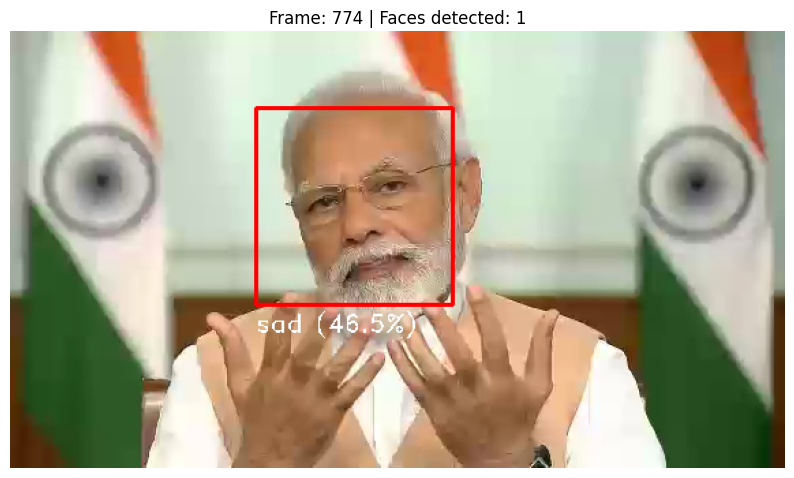

Video processing completed!
Resources released successfully


In [5]:
# Facial Expression Recognition for Jupyter Notebook

# Installing required libraries (uncomment if needed)
# !pip install opencv-python numpy tensorflow face_recognition matplotlib IPython

# Importing the required libraries
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.models import load_model
import face_recognition
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image

# Load the model
face_exp_model = load_model('dataset/facial_expression_model_combined.h5')

# Declare the emotions label
emotions_label = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

# Capture the video from file
video_path = 'images/testing/modi.mp4'
webcam_video_stream = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not webcam_video_stream.isOpened():
    print(f"Error: Could not open video file: {video_path}")
else:
    print(f"Video loaded successfully!")
    
# Create figure for displaying frames
fig, ax = plt.subplots(figsize=(10, 8))

# Initialize frame counter
frame_count = 0
process_every_n_frames = 2  # Process every nth frame for better performance

try:
    while True:
        # Get the current frame from the video stream
        ret, current_frame = webcam_video_stream.read()
        
        # Break if video ended
        if not ret:
            print("Video processing completed!")
            break
        
        frame_count += 1
        
        # Skip frames for better performance
        if frame_count % process_every_n_frames != 0:
            continue
        
        # Resize the current frame to 1/4 size to process faster
        current_frame_small = cv2.resize(current_frame, (0, 0), fx=0.25, fy=0.25)
        
        # Convert to RGB for face_recognition (it expects RGB)
        current_frame_small_rgb = cv2.cvtColor(current_frame_small, cv2.COLOR_BGR2RGB)
        
        # Detect all faces in the image
        all_face_locations = face_recognition.face_locations(
            current_frame_small_rgb, 
            number_of_times_to_upsample=1, 
            model='hog'
        )
        
        # Loop through the face locations
        for index, current_face_location in enumerate(all_face_locations):
            # Split the tuple to get the four position values
            top_pos, right_pos, bottom_pos, left_pos = current_face_location
            
            # Scale positions back to original size
            top_pos *= 4
            right_pos *= 4
            bottom_pos *= 4
            left_pos *= 4
            
            # Ensure coordinates are within frame bounds
            top_pos = max(0, top_pos)
            left_pos = max(0, left_pos)
            bottom_pos = min(current_frame.shape[0], bottom_pos)
            right_pos = min(current_frame.shape[1], right_pos)
            
            # Extract the face from the frame
            current_face_image = current_frame[top_pos:bottom_pos, left_pos:right_pos]
            
            # Skip if face region is empty
            if current_face_image.size == 0:
                continue
            
            # Draw rectangle around the face
            cv2.rectangle(current_frame, (left_pos, top_pos), (right_pos, bottom_pos), (0, 0, 255), 2)
            
            # Preprocess for emotion detection
            current_face_image = cv2.cvtColor(current_face_image, cv2.COLOR_BGR2GRAY)
            current_face_image = cv2.resize(current_face_image, (48, 48))
            img_pixels = image.img_to_array(current_face_image)
            img_pixels = np.expand_dims(img_pixels, axis=0)
            img_pixels /= 255.0  # Normalize pixels
            
            # Predict emotion
            exp_predictions = face_exp_model.predict(img_pixels, verbose=0)
            max_index = np.argmax(exp_predictions[0])
            emotion_label = emotions_label[max_index]
            confidence = exp_predictions[0][max_index] * 100
            
            # Display emotion label on frame
            label_text = f"{emotion_label} ({confidence:.1f}%)"
            cv2.putText(current_frame, label_text, (left_pos, bottom_pos + 20), 
                       cv2.FONT_HERSHEY_DUPLEX, 0.6, (255, 255, 255), 1)
        
        # Convert BGR to RGB for display
        frame_rgb = cv2.cvtColor(current_frame, cv2.COLOR_BGR2RGB)
        
        # Clear previous output and display new frame
        clear_output(wait=True)
        ax.clear()
        ax.imshow(frame_rgb)
        ax.axis('off')
        ax.set_title(f'Frame: {frame_count} | Faces detected: {len(all_face_locations)}')
        display(fig)
        
except KeyboardInterrupt:
    print("\nProcessing interrupted by user")

finally:
    # Release resources
    webcam_video_stream.release()
    plt.close(fig)
    print("Resources released successfully")